### EDA_02: Bivariate Analysis & Strategic Hypothesis-Driven Investigation
##### Project name: Employee Churn Prediction
##### Author: Fausto Pucheta Fortin

### **Overview:**
This notebook focuses on understanding the factors influencing employee turnover by performing bivariate analysis and hypothesis-driven investigation. Key steps include examining the relationships between the target variable (left) and key features, identifying significant patterns, and highlighting actionable insights for model feature engineering.

**Approach**: Application of statistical tests and insights visualization to uncover turnover patterns, considering both individual features and feature interactions that impact turnover.

#### **1. Exploration of Relationships Between Key Continuous Features and Turnover**

**1.1. Summary Statistics For Each Pair**

**1.2. Correlation Analysis** \
**1.2.1. Continuous Features**
- **Satisfaction Level vs. Left**: Visualized distributions of satisfaction levels among employees who stayed versus those who left. Focus on identifying threshold ranges that may signal increased turnover risk.

- **Last Evaluation vs. Left**: Asses last evaluation scores across turnover groups, identifying any indication of under- or over-performance that correlates with attrition.

- **Number of Projects vs. Left**: Analyze the average and distribution of project counts for retained and departed employees to determine if workload intensity influences Left.

- **Average Monthly Hours vs. Left**: To evaluate if excessive hours or low engagement (in terms of monthly hours) are associated with Left, using distribution and central tendency metrics.

- **Time Spent at Company vs. Left**: Investigate tenure patterns to understand if employees are more likely to leave at specific milestones (e.g., 1, 3, or 5 years). \

**1.2.2. Categorical Features**
- **Work Accident and Left:** Analyzed turnover rates within work accident categories (accidents vs. no accidents) to see if safety incidents influence departure decisions.

- **Promotion in Last 5 Years vs. Left:** Compared turnover rates between those who received recent promotions and those who did not, hypothesizing that lack of advancement could drive turnover.

- **Department vs. Left:** Assessed department-wise turnover rates to uncover specific functional areas (e.g., sales, technical) with higher attrition, which could signal department-specific issues.

- **Salary Level vs. Left:** Evaluated turnover distribution across salary levels (low, medium, high) to identify if compensation tiers affect employee retention.
#### **2. Hypothesis-Driven Bivariate Analysis**

**Strategy**: Frame each feature's analysis around hypotheses tied to turnover, focusing on “controllable” features (e.g., salary, promotions, workload) to uncover actionable insights for HR.

- **Hypothesis Setup**: Define practical hypotheses (e.g., _Low satisfaction is a key driver of turnover_). Structure each analysis around either validating or challenging these hypotheses.
    
- **Statistical Testing and Effect Size**: Computation of effect sizes (Cohen’s d for continuous vs. binary variables; Cramér’s V for categorical vs. binary) to measure the practical impact of each feature on turnover.
    
**2.1. Continuous Features**
- **Satisfaction Level vs. Left**
    - *Hypothesis:* Low satisfaction levels are associated with higher turnover.
    - *Statistical Test:* Mann-Whitney U Test (non-parametric) will work well given the left-skewed distribution for those who stayed and the multinomial distribution for those who left.
    - *Effect Size:* Use Cohen’s d to quantify the effect, highlighting if satisfaction levels meaningfully impact turnover.

- **Last Evaluation vs. Left**
    - *Hypothesis*: Employees with very low or very high evaluations are more likely to leave.
    - *Statistical Test:* T-test might work here since we have a normal distribution among employees who stayed. Alternatively, you could use ANOVA if you’re considering breaking the 'left' group into more subgroups (e.g., high, low, medium turnover rates based on scores).
    - *Effect Size:* Calculate Cohen’s d or eta-squared to capture the strength of this relationship, as evaluation scores could reveal patterns related to under- or over-performance and retention.

- **Average Monthly Hours vs. Left**
    - *Hypothesis:* High or low monthly hours (indicating overwork or under-engagement) are associated with higher turnover.
    - *Statistical Test:* Use the T-test or Mann-Whitney U Test if data shows non-normality or extreme values. This test will help determine if significant differences in hours correlate with turnover.
    - *Effect Size:* Use Cohen’s d for binary comparison (left vs. stayed) to understand the practical significance of hours worked.

**2.2 Categorical Features**
- **Number of Projects vs. Left**
    - *Hypothesis*: Extremely low or high project counts correlate with higher turnover.
    - *Statistical Test*: Chi-square test will help analyze the count distribution across groups, especially for understanding the significance of “extremes” in project count.
    - *Effect Size:* Cramér’s V to quantify the strength of the association.

- **Time Spent at Company vs. Left**
    - *Hypothesis*: Employees who reach specific tenure milestones (e.g., 3 years) show higher turnover likelihood.
    - *Statistical Test*: Chi-square test to evaluate tenure categories against turnover likelihood.
    - *Effect Size:* Cramér’s V to quantify the effect strength.

- **Work Accident and Left**
    - *Hypothesis*: Employees with no work accidents have a higher likelihood of leaving (indicating a possible link between disengagement and safety incidents).
    - *Statistical Test*: Chi-square test since this is a binary variable.
    - *Effect Size*: Cramér’s V will show the strength of this association.

- **Department vs. Left**
    - *Hypothesis*: Certain departments experience higher turnover due to department-specific issues.
    - *Statistical Test*: Chi-square test to assess if turnover rates significantly differ by department.
    - *Effect Size:* Cramér’s V for strength assessment.

- **Salary Level vs. Left**
    - *Hypothesis*: Lower salary levels are linked to higher turnover.
    - *Statistical Test:* Chi-square test to explore the relationship between salary levels and turnover.
    - *Effect Size:* Cramér’s V to measure effect strength.



#### **3. Targeted Bivariate Analysis Outline**
**Objective**

Leverage findings from stage 2 to refine insights into actionable recommendations. The focus will be on identifying thresholds, patterns, and key segments within features that could guide retention strategies.

**3.1 Continuous Features**
- **3.1.1 Satisfaction Level**
- **Goal**: Pinpoint satisfaction score thresholds significantly associated with higher turnover rates.
- **Method**: 
    - Bin satisfaction scores into meaningful ranges (e.g., <0.4, 0.4-0.6, >0.6).
    - Visualize turnover rates within these bins using annotated bar plots. Perform t-tests and U-tests between bins to validate significance.
- **Outcome**: 
    - Identify satisfaction thresholds that warrant targeted engagement efforts. 
    - Define actionable satisfaction levels (e.g., employees scoring below 0.4) for tailored retention strategies

- **3.1.2 Last Evaluation**:
- **Goal**: Identift if extremes in performance evaluation (low or high) correlate with turnover.
- **Method**: 
    - Create bins for last_evaluation (e.g., Low (<0.6), Moderate (0.6-0.8), High (>0.8)).
    - Plot distributions split by `left` and apply U-tests to assess significance, focusing on whether over-performing or “under-performing” employees are at higher risk.
- **Outcome**: Use insights to target development and support for at-risk employees.

- **3.1.3 Monthly Hours**
- **Goal**: Determine optimal working hour ranges to balance retention and productivity.
- **Method**:
    - Categorize employees by working hours (e.g., 100-150, 150-200, 200-250).
    - Plot turnover rates across these categories using binned bar charts.
    - Perform ANOVA or non-parametric tests to evaluate non-linear relationships.
- **Outcome**:
    - Highlight working hour thresholds where turnover increases disproportionately.
    - Provide actionable recommendations for workload adjustments.
- **3.1.4 Time Spent in Company**
- **Goal**: Identify turnover trends based on employee tenure.
- **Method**:
    - Group employees into tenure categories (e.g., <3 years, 3-5 years, >5 years).
    - Analyze turnover rates within each category using bar plots and chi-square tests.
- **Outcome**:
    - Develop tenure-based interventions, such as enhanced onboarding for new hires or career development programs for long-tenured employees.

**3.2 Categorical Features**
- **3.2.1 Salary Level**
- **Goal**: Assess turnover patterns across salary levels and inform potential adjustments.
- **Method**:
    - Plot turnover rates for each salary level (low, medium, high) using stacked bar charts.
    - Perform chi-square tests to assess the significance of differences between categories.
    - Calculate Cramér’s V to evaluate the strength of the association.
- **Outcome**:
    - Recommend targeted salary adjustments if turnover significantly decreases at higher salary levels.
- **3.2.2 Department**
- **Goal**: Identify departments with disproportionately high turnover rates.
- **Method**:
    - Create a cross-tabulation of Department by left.
    - Visualize turnover rates for each department using bar plots.
    - Apply chi-square tests and calculate Cramér’s V to evaluate the relationship.
- **Outcome**:
    - Highlight departments needing tailored retention efforts, such as training, workload management, or career growth opportunities.
- **3.2.3 Work Accident**
- **Goal**: Assess the impact of workplace accidents on turnover indirectly through satisfaction or workload.
- **Method**:
    - Segment employees who experienced accidents and compare their satisfaction scores and monthly hours with those who didn’t.
    - Visualize differences using boxplots and assess statistical significance with t-tests.
- **Outcome**:
    - Investigate whether post-accident support could mitigate turnover risks.

#### **4. Interactions and Composite Indicators**

- **Salary & Satisfaction**:
    - Hypothesis: Satisfaction has a stronger impact on turnover in low-salary groups.
    - Method: Plot satisfaction level within each salary group, comparing distributions for `left` and `stayed`.
    - Outcome: This can reveal if satisfaction-boosting policies need prioritization for certain salary brackets.
    
- **Tenure & Monthly Hours**:
    - Hypothesis: Workload impacts turnover differently for new vs. long-term employees.
    - Method: Heatmap or clustered bar plot to display monthly hours vs. tenure group turnover rates.
    - Outcome: Use to adjust workload policies, balancing work-life needs across tenure levels.


### **Summary of Findings**
- **Hypothesis-Driven Bivariate Analysis**
    - **Satisfaction Level vs. Left**: Low satisfaction is strongly linked to higher turnover. Significant difference with large effect size (Cohen's d: -0.94).

    - **Last Evaluation vs. Left**: No significant difference in evaluation scores between employees who left and those who stayed. Negligible effect (Cohen's d: 0.01).

    - **Average Monthly Hours vs. Left**: Statistically significant difference, though small effect size (Cohen's d: 0.15) suggests minimal impact of monthly hours on turnover.

    - **Number of Projects vs. Left**: Strong association with turnover, especially at project extremes. Large effect size (Cramér's V: 0.60).

    - **Time Spent at Company vs. Left**: Tenure significantly impacts turnover, particularly around certain milestones, with a strong association (Cramér's V: 0.38).

    - **Work Accident vs. Left**: Moderate association; employees with no work accidents show a higher likelihood of leaving. Medium effect size (Cramér's V: 0.15).

    - **Department vs. Left**: While statistically significant, department has a negligible effect size on turnover (Cramér's V: 0.08).

    - **Salary vs. Left**: Lower salary levels correlate with higher turnover. Moderate association (Cramér's V: 0.16).

In [30]:
# IMPORT LIBRARIES

# Operational
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from src.utils.plot_functions import save_fig
# Statistics
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.proportion import proportions_ztest


# Optional for effect size (Cohen's d) and other convenience functions:
import pingouin as pg

# Formatting Summary Tables
from tabulate import tabulate

df = pd.read_csv("./../data/processed/df_subset.csv")

#### **1. Exploration of Relationships Between Key Continuous Features and Turnover**

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,Department,salary
0,0.38,0.53,2,157,3,0,1,sales,low
1,0.80,0.86,5,262,6,0,1,sales,medium
2,0.11,0.88,7,272,4,0,1,sales,medium
3,0.72,0.87,5,223,5,0,1,sales,low
4,0.37,0.52,2,159,3,0,1,sales,low


1.1. **Summary Statistics For Each Pair**

In [4]:
# 1. Data Overview: Summary statistics of satisfaction level by 'left' status
print("Summary Statistics for Satisfaction Level by Turnover Status (left):")
satisfaction_summary = df.groupby('left')['satisfaction_level'].describe()
print(satisfaction_summary)


Summary Statistics for Satisfaction Level by Turnover Status (left):
        count      mean       std   min   25%   50%   75%   max
left                                                           
0     11428.0  0.666810  0.217104  0.12  0.54  0.69  0.84  1.00
1      3571.0  0.440098  0.263933  0.09  0.13  0.41  0.73  0.92


In [5]:
# 1. Data Overview: Summary statistics of Last Evaluation by 'left' status
print("Summary Statistics for Last Evaluation by Turnover Status (left):")
last_evaluation_summary = df.groupby('left')['last_evaluation'].describe()
print(last_evaluation_summary)


Summary Statistics for Last Evaluation by Turnover Status (left):
        count      mean       std   min   25%   50%   75%  max
left                                                          
0     11428.0  0.715473  0.162005  0.36  0.58  0.71  0.85  1.0
1      3571.0  0.718113  0.197673  0.45  0.52  0.79  0.90  1.0


In [6]:
# 1. Data Overview: Summary statistics of Number of Projects by 'left' status
print("Summary Statistics for Number of Projects by Turnover Status (left):")
n_of_projects_summary = df.groupby('left')['number_project'].describe()
print(n_of_projects_summary)


Summary Statistics for Number of Projects by Turnover Status (left):
        count      mean       std  min  25%  50%  75%  max
left                                                      
0     11428.0  3.786664  0.979884  2.0  3.0  4.0  4.0  6.0
1      3571.0  3.855503  1.818165  2.0  2.0  4.0  6.0  7.0


In [7]:
# 1. Data Overview: Summary statistics of Average Monthly Hours by 'left' status
print("Summary Statistics for Average Monthly Hours by Turnover Status (left):")
avg_monthly_hours_summary = df.groupby('left')['average_montly_hours'].describe()
print(avg_monthly_hours_summary)


Summary Statistics for Average Monthly Hours by Turnover Status (left):
        count        mean        std    min    25%    50%    75%    max
left                                                                   
0     11428.0  199.060203  45.682731   96.0  162.0  198.0  238.0  287.0
1      3571.0  207.419210  61.202825  126.0  146.0  224.0  262.0  310.0


In [8]:
# 1. Data Overview: Summary statistics of Time Spend Company by 'left' status
print("Summary Statistics for Time Spend Company by Turnover Status (left):")
time_spend_company_summary = df.groupby('left')['time_spend_company'].describe()
print(time_spend_company_summary)


Summary Statistics for Time Spend Company by Turnover Status (left):
        count      mean       std  min  25%  50%  75%   max
left                                                       
0     11428.0  3.380032  1.562348  2.0  2.0  3.0  4.0  10.0
1      3571.0  3.876505  0.977698  2.0  3.0  4.0  5.0   6.0


**1.2. Correlation Analysis**

Saved at ./../reports/figures/02-EDA_02\pairplot.png


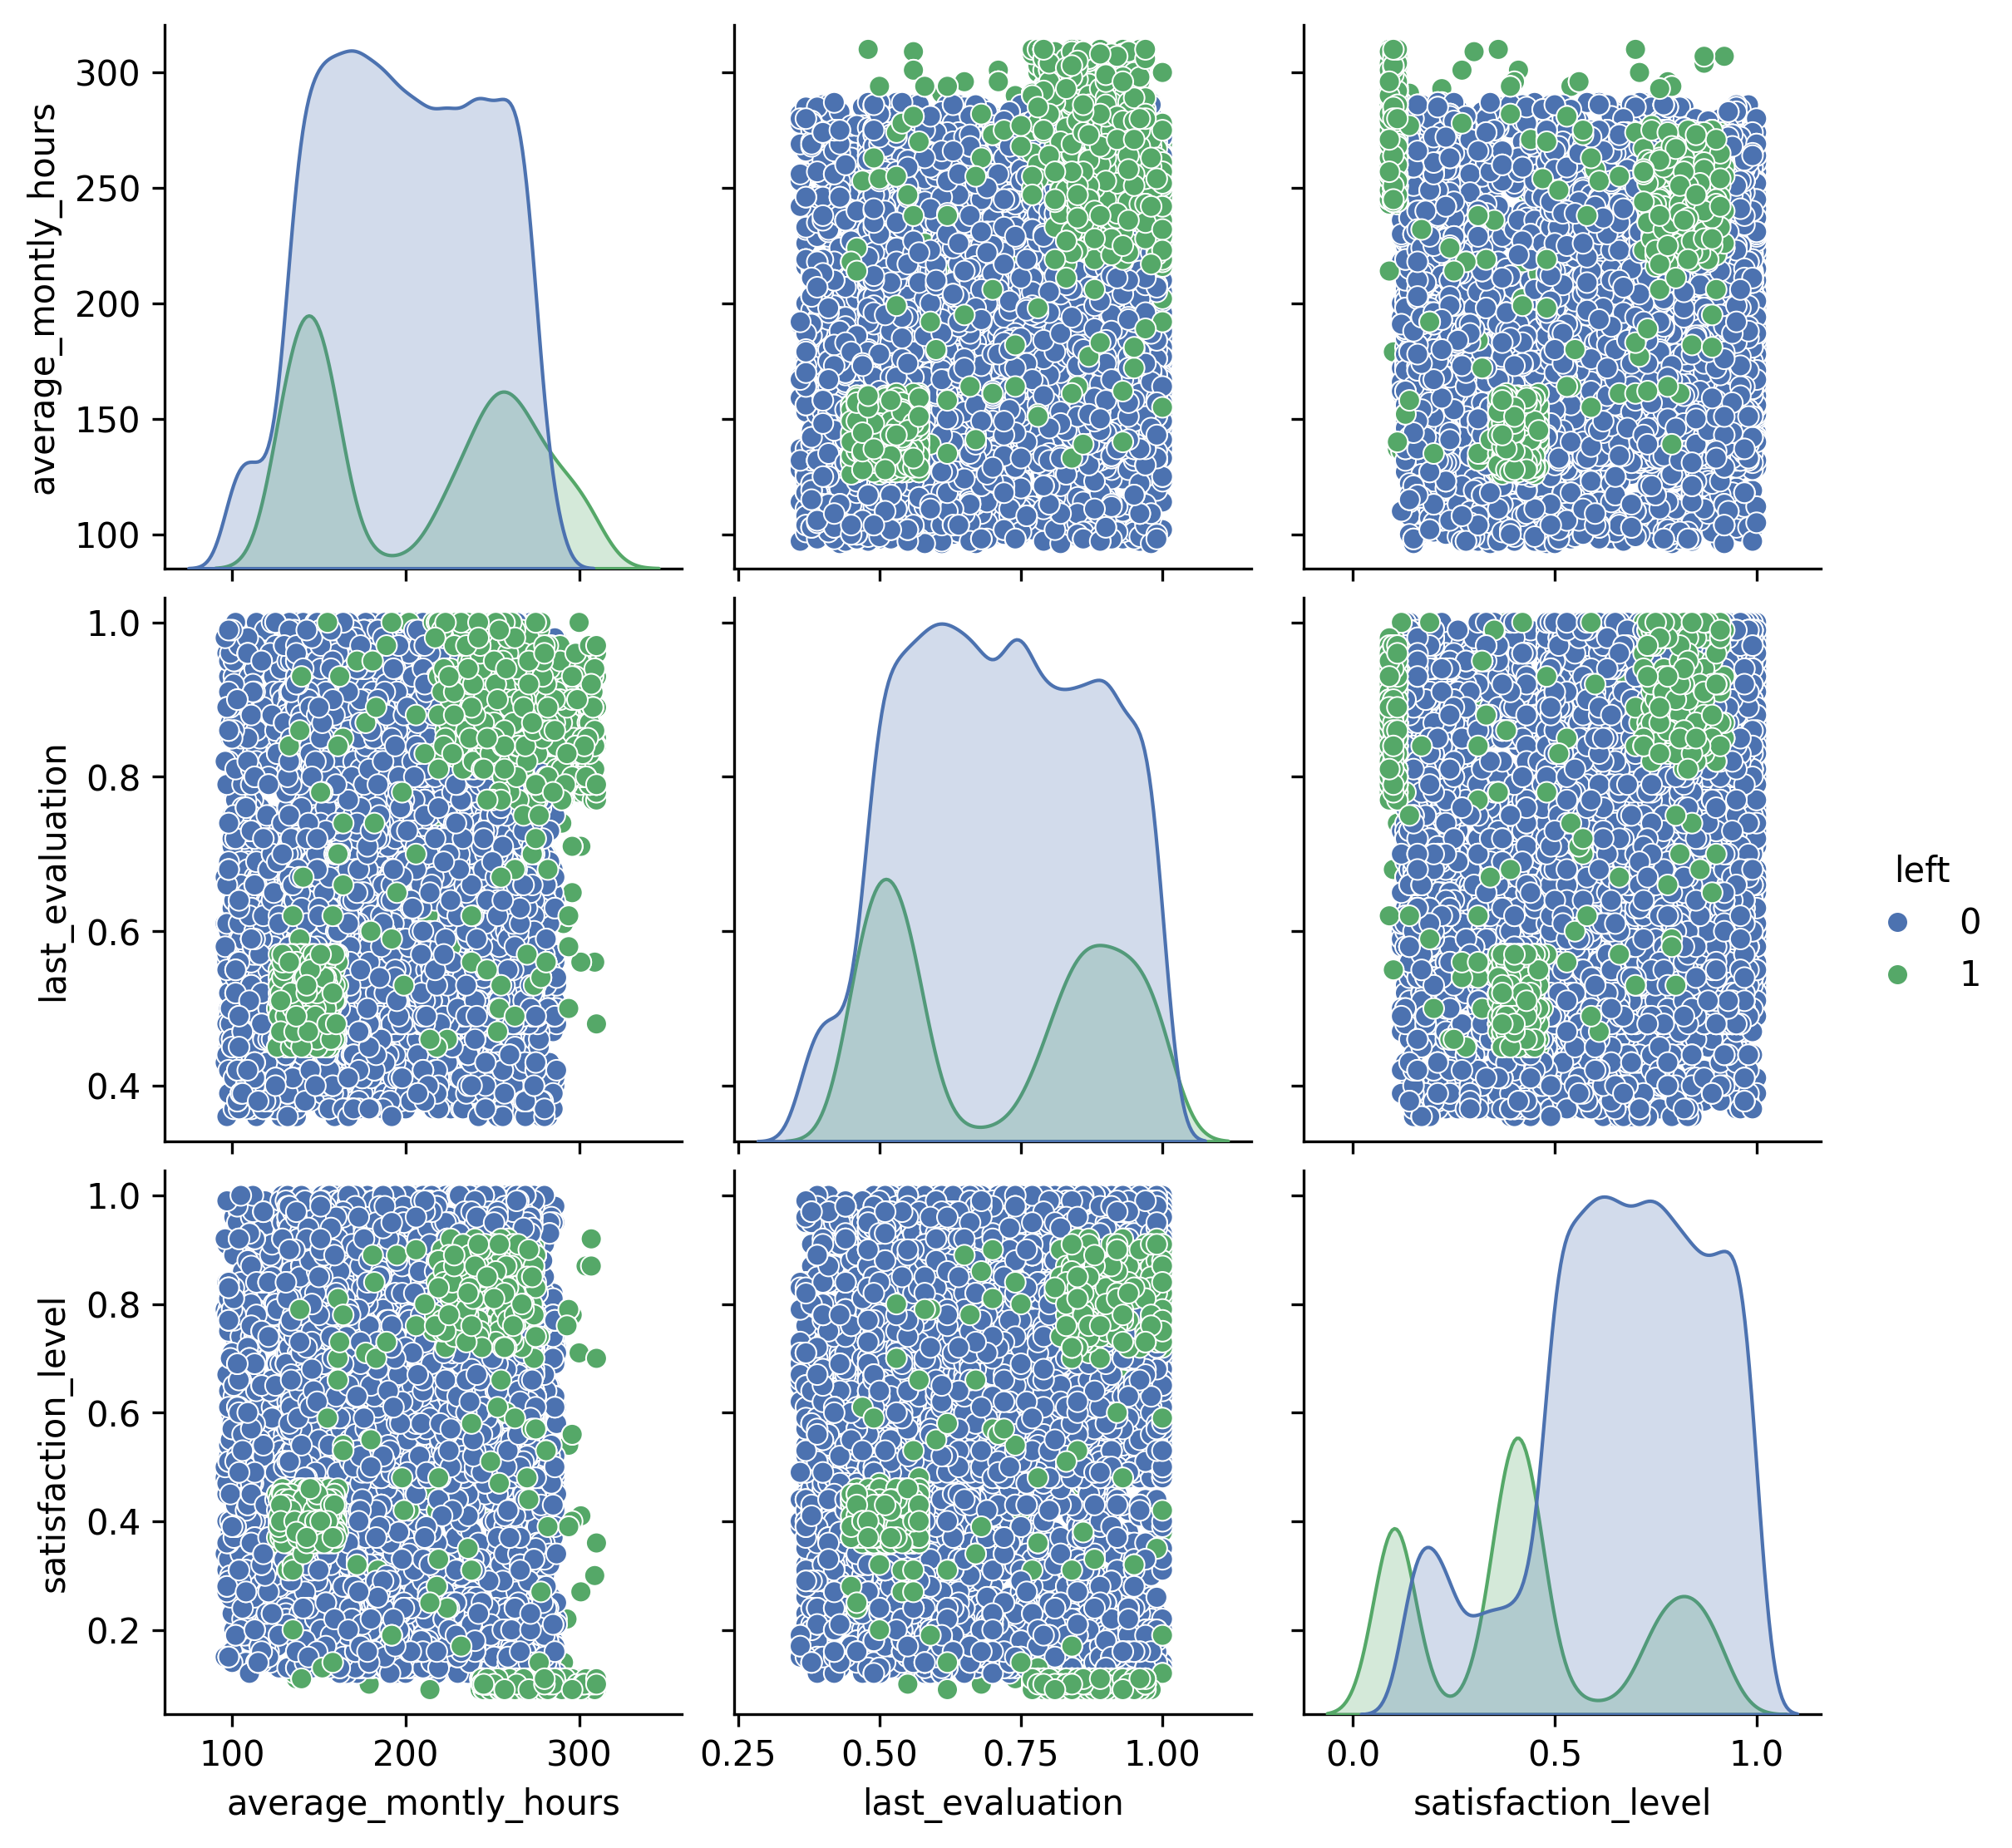

In [33]:
continuous_features = df[['left','average_montly_hours', 'last_evaluation', 'satisfaction_level']]

pairplot = sns.pairplot(continuous_features, hue='left')
pairplot = plt.gcf()
save_fig(pairplot, "./../reports/figures/02-EDA_02", "pairplot", "png")
pairplot

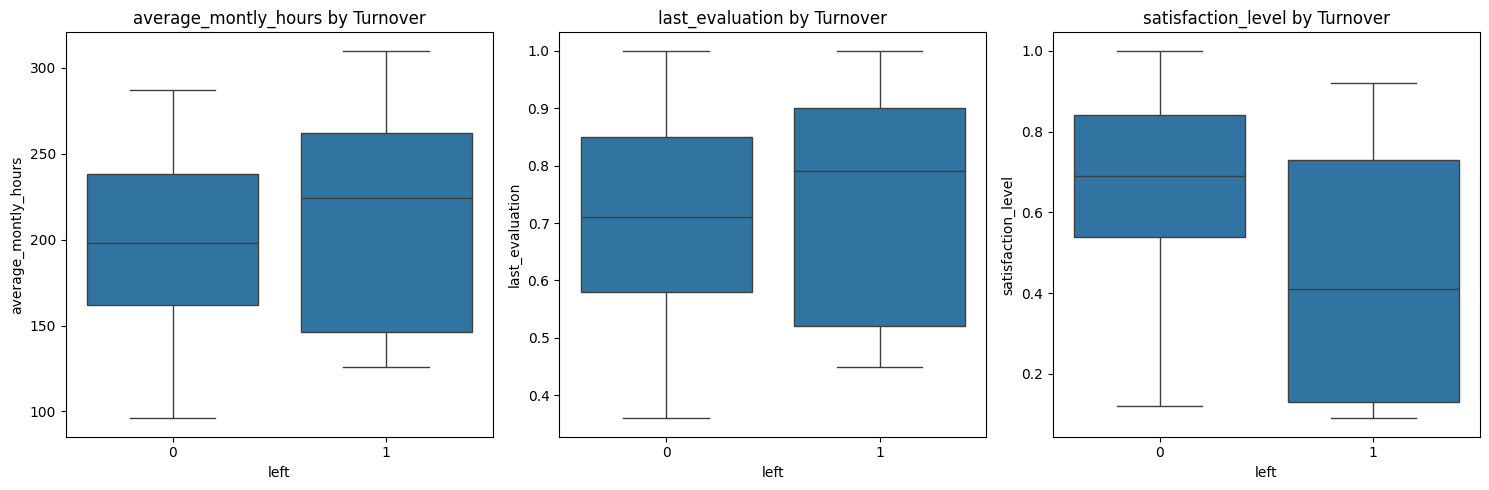

In [10]:
continuous_columns = ['average_montly_hours', 'last_evaluation', 'satisfaction_level']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_columns), figsize=(15,5), sharey=False)

for i, feature in enumerate(continuous_columns):
    sns.boxplot(x='left', y=feature, data=continuous_features, ax=axes[i])
    axes[i].set_title(f'{feature} by Turnover')

plt.tight_layout()
plt.show()

**1.2. Categorical Features**

In [ ]:
categorical_columns = ['salary', 'number_project', 'time_spend_company', 'Work_accident', 'Department']


for feature in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, hue='left')
    plt.title(f'{feature} by Left')
    plt.xticks(rotation=45)
    plt.legend(title='Left', loc='upper right')
    #save_fig(plt.gcf(), "./../reports/figures/02-EDA_02", feature,"png")
    plt.show()

Saved at ./../reports/figures/02-EDA_02\salary.png
Saved at ./../reports/figures/02-EDA_02\number_project.png
Saved at ./../reports/figures/02-EDA_02\time_spend_company.png
Saved at ./../reports/figures/02-EDA_02\Work_accident.png
Saved at ./../reports/figures/02-EDA_02\Department.png


### **2. Hypothesis-Driven Bivariate Analysis** 

#### **2.1. Continuous Features**

- **Satisfaction Level vs. Left**

To implement the analysis for Satisfaction Level vs. Left, we’ll begin with the Mann-Whitney U Test to check if there is a statistically significant difference in satisfaction levels between employees who left and those who stayed. Following that, we’ll calculate Cohen’s d to measure the practical significance (effect size) of the difference.

In [12]:
# Subset the satisfaction levels based on whether the employee left or stayed
satisfaction_left = df[df['left'] == 1]['satisfaction_level']
satisfaction_stayed = df[df['left'] == 0]['satisfaction_level']

# Step 1: Mann-Whitney U Test
stat, p_value = mannwhitneyu(satisfaction_left, satisfaction_stayed, alternative='two-sided')
print("Mann-Whitney U Test:")
print(f"Statistic: {stat}, p-value: {p_value}")

# Interpretation of the p-value
if p_value < 0.05:
    print("There is a statistically significant difference in satisfaction levels between employees who left and those who stayed.")
else:
    print("No statistically significant difference found in satisfaction levels between the two groups.")

# Step 2: Cohen's d calculation for effect size
mean_diff = satisfaction_left.mean() - satisfaction_stayed.mean()
pooled_std = np.sqrt((satisfaction_left.std()**2 + satisfaction_stayed.std()**2) / 2)
cohens_d = mean_diff / pooled_std

print("\nEffect Size (Cohen's d):")
print(f"Cohen's d: {cohens_d}")

# Interpretation of Cohen's d
if abs(cohens_d) < 0.2:
    print("Effect size is small (negligible difference).")
elif abs(cohens_d) < 0.5:
    print("Effect size is medium (moderate difference).")
else:
    print("Effect size is large (substantial difference).")

Mann-Whitney U Test:
Statistic: 10286473.0, p-value: 0.0
There is a statistically significant difference in satisfaction levels between employees who left and those who stayed.

Effect Size (Cohen's d):
Cohen's d: -0.9381596742699109
Effect size is large (substantial difference).


- **Last Evaluation vs. Left**

For Last Evaluation vs. Left, the goal is to test if extreme evaluations (either very low or very high) correlate with higher turnover rates. Since we have a normal distribution for those who stayed, a t-test will be suitable for comparing the mean evaluation scores between those who left and those who stayed.

In [13]:
# Subset the last evaluation scores based on whether the employee left or stayed
evaluation_left = df[df['left'] == 1]['last_evaluation']
evaluation_stayed = df[df['left'] == 0]['last_evaluation']

# Step 1: T-test
t_stat, p_value = ttest_ind(evaluation_left, evaluation_stayed, equal_var=False)  # Welch's t-test
print("T-Test:")
print(f"T-Statistic: {t_stat}, p-value: {p_value}")

# Interpretation of the p-value
if p_value < 0.05:
    print("There is a statistically significant difference in evaluation scores between employees who left and those who stayed.")
else:
    print("No statistically significant difference found in evaluation scores between the two groups.")

# Step 2: Cohen's d calculation for effect size
mean_diff = evaluation_left.mean() - evaluation_stayed.mean()
pooled_std = math.sqrt((evaluation_left.std()**2 + evaluation_stayed.std()**2) / 2)
cohens_d = mean_diff / pooled_std

print("\nEffect Size (Cohen's d):")
print(f"Cohen's d: {cohens_d}")

# Interpretation of Cohen's d
if abs(cohens_d) < 0.2:
    print("Effect size is small (negligible difference).")
elif abs(cohens_d) < 0.5:
    print("Effect size is medium (moderate difference).")
else:
    print("Effect size is large (substantial difference).")

T-Test:
T-Statistic: 0.7253423415891875, p-value: 0.46827496132319124
No statistically significant difference found in evaluation scores between the two groups.

Effect Size (Cohen's d):
Cohen's d: 0.014603564357155435
Effect size is small (negligible difference).


- **Average Monthly Hours vs. Left:**

For Average Monthly Hours vs. Left, our goal is to investigate whether significant differences in average monthly hours correlate with turnover. Since we’re considering overwork or under-engagement as potential factors, this analysis will check if these hours differ meaningfully between employees who left and those who stayed.

In [14]:
# Subset average monthly hours for employees who left and those who stayed
hours_left = df[df['left'] == 1]['average_montly_hours']
hours_stayed = df[df['left'] == 0]['average_montly_hours']

# Step 1: Normality check
# Use Shapiro-Wilk test as an example (or visual inspection)
from scipy.stats import shapiro

shapiro_left = shapiro(hours_left)
shapiro_stayed = shapiro(hours_stayed)

print("Shapiro-Wilk Test for Normality:")
print(f"Left group - W-statistic: {shapiro_left[0]}, p-value: {shapiro_left[1]}")
print(f"Stayed group - W-statistic: {shapiro_stayed[0]}, p-value: {shapiro_stayed[1]}")

# Choosing the test based on normality results
if shapiro_left[1] < 0.05 or shapiro_stayed[1] < 0.05:
    # Non-normal distribution: Use Mann-Whitney U Test
    u_stat, p_value = mannwhitneyu(hours_left, hours_stayed, alternative='two-sided')
    print("\nMann-Whitney U Test:")
    print(f"U-Statistic: {u_stat}, p-value: {p_value}")
else:
    # Normal distribution: Use t-test
    t_stat, p_value = ttest_ind(hours_left, hours_stayed, equal_var=False)
    print("\nT-Test:")
    print(f"Statistic: {t_stat}, p-value: {p_value}")

# Step 2: Interpretation of the p-value
if p_value < 0.05:
    print("There is a statistically significant difference in monthly hours between employees who left and those who stayed.")
else:
    print("No statistically significant difference found in monthly hours between the two groups.")

# Step 3: Cohen’s d for Effect Size
mean_diff = hours_left.mean() - hours_stayed.mean()
pooled_std = math.sqrt((hours_left.std()**2 + hours_stayed.std()**2) / 2)
cohens_d = mean_diff / pooled_std

print("\nEffect Size (Cohen's d):")
print(f"Cohen's d: {cohens_d}")

# Interpretation of Cohen's d
if abs(cohens_d) < 0.2:
    print("Effect size is small (negligible difference).")
elif abs(cohens_d) < 0.5:
    print("Effect size is medium (moderate difference).")
else:
    print("Effect size is large (substantial difference).")

Shapiro-Wilk Test for Normality:
Left group - W-statistic: 0.8667445038620686, p-value: 5.730499424373329e-48
Stayed group - W-statistic: 0.9728166623228033, p-value: 8.542575423847352e-42

Mann-Whitney U Test:
U-Statistic: 21689600.5, p-value: 1.2769565984354332e-08
There is a statistically significant difference in monthly hours between employees who left and those who stayed.

Effect Size (Cohen's d):
Cohen's d: 0.15478717198253833
Effect size is small (negligible difference).


d:\Anaconda\envs\employeechurn\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11428.
  res = hypotest_fun_out(*samples, **kwds)


#### **2.2. Categorical Features**

- **Number of Projects vs. Left:**

For Number of Projects vs. Left, we’ll test if having an extreme number of projects correlates with higher turnover. A Chi-square test will determine if the distribution of project counts differs significantly between those who left and those who stayed, and Cramér’s V will measure the strength of this association.

- **Goal**: Pinpoint Number of projects thresholds that are significantly associated with higher turnover rates.
- **Method**:
    - Created number of projects bins (e.g., <0.4, 0.4-0.6, >0.6).
    - Visualize turnover rates within these bins using boxplots or bar plots. Perform t-tests or U-tests between bins to validate significance.
- **Outcome**:
    - Identify satisfaction thresholds that warrant targeted engagement efforts.
   -  Define actionable satisfaction levels (e.g., employees scoring below 0.4) for tailored retention strategies

In [15]:
# Step 1: Contingency table for Number of Projects vs. Left
contingency_table = pd.crosstab(df['number_project'], df['left'])
print("Contingency Table:\n", contingency_table)

# Step 2: Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nChi-square Test Results:")
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_value}")

# Interpretation of p-value
if p_value < 0.05:
    print("There is a statistically significant association between the number of projects and turnover.")
else:
    print("No statistically significant association found between the number of projects and turnover.")
    
    
# Step 3: Effect Size (Cramér’s V)
# Cramér’s V calculation
n = contingency_table.sum().sum()  # Total observations
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
print("\nEffect Size (Cramér's V):")
print(f"Cramér's V: {cramers_v}")

# Interpretation of Cramér’s V
if cramers_v < 0.1:
    print("Effect size is small (negligible association).")
elif cramers_v < 0.3:
    print("Effect size is medium (moderate association).")
else:
    print("Effect size is large (strong association).")

Contingency Table:
 left               0     1
number_project            
2                821  1567
3               3983    72
4               3956   409
5               2149   612
6                519   655
7                  0   256

Chi-square Test Results:
Chi-square statistic: 5373.586480049047, p-value: 0.0
There is a statistically significant association between the number of projects and turnover.

Effect Size (Cramér's V):
Cramér's V: 0.5985507354174702
Effect size is large (strong association).


- **Time Spent at Company vs. Left:**

To analyze Time Spent at Company vs. Left, we’ll conduct a Chi-square test to assess if certain tenure milestones are associated with higher turnover. Using Cramér’s V will quantify how strongly tenure impacts the likelihood of turnover.

In [16]:
# Step 1: Create a contingency table for Time Spent at Company vs. Left
contingency_table_tenure = pd.crosstab(df['time_spend_company'], df['left'])
print("Contingency Table:\n", contingency_table_tenure)

# Step 2: Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_tenure)
print("\nChi-square Test Results:")
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_value}")

# Interpretation of p-value
if p_value < 0.05:
    print("There is a statistically significant association between tenure and turnover.")
else:
    print("No statistically significant association found between tenure and turnover.")

# Step 3: Effect Size (Cramér’s V)
# Calculate total observations
n = contingency_table_tenure.sum().sum()

# Cramér's V calculation
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table_tenure.shape) - 1)))
print("\nEffect Size (Cramér's V):")
print(f"Cramér's V: {cramers_v}")

# Interpretation of Cramér’s V
if cramers_v < 0.1:
    print("Effect size is small (negligible association).")
elif cramers_v < 0.3:
    print("Effect size is medium (moderate association).")
else:
    print("Effect size is large (strong association).")


Contingency Table:
 left                   0     1
time_spend_company            
2                   3191    53
3                   4857  1586
4                   1667   890
5                    640   833
6                    509   209
7                    188     0
8                    162     0
10                   214     0

Chi-square Test Results:
Chi-square statistic: 2110.079505335631, p-value: 0.0
There is a statistically significant association between tenure and turnover.

Effect Size (Cramér's V):
Cramér's V: 0.37507512018095873
Effect size is large (strong association).


- **Work Accident and Left**

- To test the hypothesis on Work Accident and Left, we'll perform a **Chi-square test** to check if there's an association between accident history and turnover. A p-value below 0.05 will imply a significant relationship, suggesting that accident history may influence turnover. 
- We’ll then calculate **Cramér’s V** to understand the strength of the association. A higher Cramér’s V indicates a more substantial relationship, providing insights into the relevance of accident history as a factor in turnover.

In [17]:
# Step 1: Create a contingency table for Work Accident vs. Left
contingency_table_accident = pd.crosstab(df['Work_accident'], df['left'])
print("Contingency Table:\n", contingency_table_accident)

# Step 2: Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_accident)
print("\nChi-square Test Results:")
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_value}")

# Interpretation of p-value
if p_value < 0.05:
    print("There is a statistically significant association between work accidents and turnover.")
else:
    print("No statistically significant association found between work accidents and turnover.")

# Step 3: Effect Size (Cramér’s V)
# Calculate total observations
n = contingency_table_accident.sum().sum()

# Cramér's V calculation
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table_accident.shape) - 1)))
print("\nEffect Size (Cramér's V):")
print(f"Cramér's V: {cramers_v}")

# Interpretation of Cramér’s V
if cramers_v < 0.1:
    print("Effect size is small (negligible association).")
elif cramers_v < 0.3:
    print("Effect size is medium (moderate association).")
else:
    print("Effect size is large (strong association).")


Contingency Table:
 left              0     1
Work_accident            
0              9428  3402
1              2000   169

Chi-square Test Results:
Chi-square statistic: 357.5623604097228, p-value: 9.55823958002199e-80
There is a statistically significant association between work accidents and turnover.

Effect Size (Cramér's V):
Cramér's V: 0.15439909315141476
Effect size is medium (moderate association).


- **Department vs. Left**

- To examine the relationship between Department and Turnover, we’ll apply a **Chi-square test** to determine if turnover rates differ significantly by department. A significant p-value (under 0.05) wil  suggest turnover rates differ across departments.
- **Cramér’s V** will help gauge the effect size and strength of this relationship. A higher Cramér’s V will imply a stronger connection, indicating if department-specific factors could be influencing turnover.

In [18]:

# Step 1: Create a contingency table for Department vs. Left
contingency_table_department = pd.crosstab(df['Department'], df['left'])
print("Contingency Table:\n", contingency_table_department)

# Step 2: Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_department)
print("\nChi-square Test Results:")
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_value}")

# Interpretation of p-value
if p_value < 0.05:
    print("There is a statistically significant association between department and turnover.")
else:
    print("No statistically significant association found between department and turnover.")

# Step 3: Effect Size (Cramér’s V)
# Calculate total observations
n = contingency_table_department.sum().sum()

# Cramér's V calculation
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table_department.shape) - 1)))
print("\nEffect Size (Cramér's V):")
print(f"Cramér's V: {cramers_v}")

# Interpretation of Cramér’s V
if cramers_v < 0.1:
    print("Effect size is small (negligible association).")
elif cramers_v < 0.3:
    print("Effect size is medium (moderate association).")
else:
    print("Effect size is large (strong association).")

Contingency Table:
 left            0     1
Department             
IT            954   273
RandD         666   121
accounting    563   204
hr            524   215
management    539    91
marketing     655   203
product_mng   704   198
sales        3126  1014
support      1674   555
technical    2023   697

Chi-square Test Results:
Chi-square statistic: 86.82547426790299, p-value: 7.042130463822518e-15
There is a statistically significant association between department and turnover.

Effect Size (Cramér's V):
Cramér's V: 0.07608384104340461
Effect size is small (negligible association).


- **Salary Level vs. Left**

Let’s wrap up with Salary Level vs. Turnover using a Chi-square test to examine if turnover rates differ by salary level, with Cramér’s V to gauge the effect strength.

In [19]:
# Step 1: Create a contingency table for Salary Level vs. Left
contingency_table_salary = pd.crosstab(df['salary'], df['left'])
print("Contingency Table:\n", contingency_table_salary)

# Step 2: Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_salary)
print("\nChi-square Test Results:")
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_value}")

# Interpretation of p-value
if p_value < 0.05:
    print("There is a statistically significant association between salary level and turnover.")
else:
    print("No statistically significant association found between salary level and turnover.")

# Step 3: Effect Size (Cramér’s V)
# Calculate total observations
n = contingency_table_salary.sum().sum()

# Cramér's V calculation
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table_salary.shape) - 1)))
print("\nEffect Size (Cramér's V):")
print(f"Cramér's V: {cramers_v}")

# Interpretation of Cramér’s V
if cramers_v < 0.1:
    print("Effect size is small (negligible association).")
elif cramers_v < 0.3:
    print("Effect size is medium (moderate association).")
else:
    print("Effect size is large (strong association).")


Contingency Table:
 left       0     1
salary            
high    1155    82
low     5144  2172
medium  5129  1317

Chi-square Test Results:
Chi-square statistic: 381.22504706621066, p-value: 1.652086749295958e-83
There is a statistically significant association between salary level and turnover.

Effect Size (Cramér's V):
Cramér's V: 0.15942615087949968
Effect size is medium (moderate association).


### **3. Targeted Bivariate Analysis Outline**

3.1. **Continuous Features**:

- **Satisfaction Level**

Understanding how satisfaction levels relate to turnover is critical for targeted employee retention strategies. By identifying satisfaction thresholds significantly associated with turnover, HR teams can focus on improving engagement and satisfaction in at-risk groups.

- **Findings Summary**
    - **Turnover Rates**: \
    Employees with low satisfaction (<0.4) have the highest turnover rate (55.54%), compared to 23.99% for medium satisfaction (0.4–0.6) and 11.74% for high satisfaction (>0.6). \
    This highlights a strong negative correlation between satisfaction and turnover.
    - **Statistical Validation**: \
    **T-test**: Significant difference between low and medium satisfaction bins (t-stat = 27.7, p-value ≈ 0.0), confirming the mean turnover rates differ substantially. \
    **Mann-Whitney U-test**: Reinforces findings with p-value ≈ 0.0, showing a strong effect independent of distribution assumptions.
    - **Actionable Insight**: \
    Employees scoring below 0.4 on satisfaction are at the highest risk of turnover and should be the focus of retention efforts like improved engagement programs or management interventions.

In [ ]:
# Define bins for satisfaction scores
bins = [0, 0.4, 0.6, 1.0]  # Define thresholds
labels = ['Low (<0.4)', 'Medium (0.4-0.6)', 'High (>0.6)']
df['satisfaction_bin'] = pd.cut(df['satisfaction_level'], bins=bins, labels=labels)

# Calculate turnover rates per bin
turnover_rates_satisfaction = df.groupby(['satisfaction_bin'], observed=True)['left'].mean().sort_values(ascending=False)
turnover_rates_satisfaction_percentage = (turnover_rates_satisfaction * 100).round(2)
print("Turnover Rates by Satisfaction Level:\n", turnover_rates_satisfaction)

# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(x=turnover_rates_satisfaction_percentage.values,
            y=turnover_rates_satisfaction_percentage.index,
            palette="viridis", legend=False,
            hue=turnover_rates_satisfaction_percentage.index,
            order=turnover_rates_satisfaction_percentage.index)

# Annotate bar plot
for index, value in enumerate(turnover_rates_satisfaction_percentage):
    plt.text(value + 0.5, index, f"{value}%", va='center', ha='left', fontsize=10)

# Customizations
plt.title("Turnover Rates by Satisfaction", fontsize=16)
plt.xlabel("Turnover Rate (%)", fontsize=12)
plt.ylabel("Satisfaction", fontsize=12)
plt.tight_layout()

plt.show()

# Save Figure
#figure = plt.gcf()
#save_fig(figure, "./../reports/figures/02-EDA_02", "satisfaction_vs_left", 'png')

# Perform statistical tests
low_satisfaction = df[df['satisfaction_bin'] == 'Low (<0.4)']['left']
medium_satisfaction = df[df['satisfaction_bin'] == 'Medium (0.4-0.6)']['left']
high_satisfaction = df[df['satisfaction_bin'] == 'High (>0.6)']['left']

# T-test between low and medium satisfaction bins
t_stat, p_val_ttest = ttest_ind(low_satisfaction, medium_satisfaction, equal_var=False)
print(f"T-test between Low and Medium Satisfaction: t-stat = {t_stat}, p-value = {p_val_ttest}")

# Mann-Whitney U-test between low and medium satisfaction bins
u_stat, p_val_utest = mannwhitneyu(low_satisfaction, medium_satisfaction, alternative='two-sided')
print(f"Mann-Whitney U-test between Low and Medium Satisfaction: u-stat = {u_stat}, p-value = {p_val_utest}")

# Optional: Actionable threshold based on results
threshold_low = bins[1]  # 0.4 as a critical satisfaction threshold
print(f"Critical Satisfaction Threshold: Employees scoring below {threshold_low} warrant targeted engagement efforts.")

Turnover Rates by Satisfaction Level:
 satisfaction_bin
Low (<0.4)          0.555378
Medium (0.4-0.6)    0.239945
High (>0.6)         0.117412
Name: left, dtype: float64
Saved at ./../reports/figures/02-EDA_02\satisfaction_vs_left.png
T-test between Low and Medium Satisfaction: t-stat = 27.700321842666053, p-value = 2.50066125656261e-159
Mann-Whitney U-test between Low and Medium Satisfaction: u-stat = 7407217.5, p-value = 9.63867511060295e-155
Critical Satisfaction Threshold: Employees scoring below 0.4 warrant targeted engagement efforts.


- **Last Evaluation**

We will determine if extremes in performance evaluation scores (both low and high) are correlated with higher turnover rates, helping to identify at-risk groups.

1. **Data Preparation:**
    Analyze last_evaluation scores split by turnover status (left).
    Create bins for last_evaluation (e.g., Low (<0.6), Moderate (0.6-0.8), High (>0.8)).
2. **Visualization:**
    Use annotated barplots to compare evaluation score bins.
3. **Statistical Tests:**
    Conduct Mann-Whitney U-tests to compare score distributions *across bins* to validate the significance of differences.

- **Findings Summary**:
    - **Turnover Rates by Evaluation Score Range** \
    Moderate Performers (0.6-0.8) have the lowest turnover rates (*5.83%*), suggesting they are the most stable group. \
    Low Performers (<0.6) With a turnover rate of *32.54%*, they are at high risk of turnover, likely due to underperformance or disengagement. \
    High Performers (>0.8) also exhibit high turnover (*30.81%*), potentially driven by burnout, unmet career expectations, or external opportunities.

    - **Statistical Insights** \
    Mann-Whitney U-test results show highly significant differences between Low (<0.6) and High (>0.8) evaluation scores (p-value = 0.0). This confirms that turnover behavior varies substantially based on performance extremes.
    
- **Actionable Insights** 
    - **For Low Performers (<0.6)**: \
    Development Plans: Offer performance improvement programs and mentoring.\
    Engagement Strategies: Foster inclusion and support to improve satisfaction and performance. 
    - **For High Performers (>0.8)**:\
    Retention Initiatives: Provide clear career advancement paths, competitive rewards, and recognition programs. \
    Burnout Prevention: Monitor workloads and encourage work-life balance. 
    - **For Moderate Performers (0.6-0.8)**: \
    Maintain current engagement strategies to sustain retention in this stable group.

In [ ]:
# Bin last evaluation scores
bins = [0, 0.6, 0.8, 1.0]
labels = ['Low (<0.6)', 'Moderate (0.6-0.8)', 'High (>0.8)']
df['evaluation_bin'] = pd.cut(df['last_evaluation'], bins=bins, labels=labels, include_lowest=True)

# Calculate turnover rates by bin
turnover_rates_evaluation = df.groupby(['evaluation_bin'], observed=True)['left'].mean().sort_values(ascending=False)
turnover_rates_evaluation_percentage = (turnover_rates_evaluation * 100).round(2)
print("Turnover Rates by Last Evaluation Bin:\n", turnover_rates_evaluation)

# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(x=turnover_rates_evaluation_percentage.values,
            y=turnover_rates_evaluation_percentage.index,
            palette="viridis", legend=False,
            hue=turnover_rates_evaluation_percentage.index,
            order=turnover_rates_evaluation_percentage.index)

# Annotate bar plot
for index, value in enumerate(turnover_rates_evaluation_percentage):
    plt.text(value + 0.5, index, f"{value}%", va='center', ha='left', fontsize=10)

# Customizations
plt.title("Turnover Rates by Last Evaluation", fontsize=16)
plt.xlabel("Turnover Rate (%)", fontsize=12)
plt.ylabel("Last Evaluation", fontsize=12)
plt.tight_layout()

plt.show()

# Save Figure
#figure = plt.gcf()
#save_fig(figure, "./../reports/figures/02-EDA_02", "last_evaluation_vs_left", 'png')


# Statistical tests
low_scores = df[df['evaluation_bin'] == 'Low (<0.6)']['last_evaluation']
high_scores = df[df['evaluation_bin'] == 'High (>0.8)']['last_evaluation']

# Mann-Whitney U-test
u_stat, p_val_mwu = mannwhitneyu(low_scores, high_scores, alternative='two-sided')
print(f"Mann-Whitney U-test: u-stat = {u_stat}, p-value = {p_val_mwu}")

Turnover Rates by Last Evaluation Bin:
 evaluation_bin
Low (<0.6)            0.325408
High (>0.8)           0.308071
Moderate (0.6-0.8)    0.058280
Name: left, dtype: float64
Saved at ./../reports/figures/02-EDA_02\last_evaluation_vs_left.png
Mann-Whitney U-test: u-stat = 0.0, p-value = 0.0


- **Monthly Hours**

We will asess the relationship between monthly working hours and turnover to identify potential thresholds of excessive workload associated with higher turnover rates.

1. **Data Preparation:** \
Divide monthly_hours into ranges (e.g., 100-150, 150-200, etc.). \
Calculate turnover rates (left) for each range.
2. **Visualization**: \
Annotated bar horizontal bar plots to display turnover rates for each range of hours.
3. **Statistical Testing**: \
Conduct ANOVA to check for differences in turnover rates across bins. \
Use Kruskal-Wallis H-test if data distribution is non-normal.

- **Findings Summary**:
    - **Turnover Rates by Hours Bin:** \
    100-150 hours: 35.96% turnover rate (high). \
    150-200 hours: 13.21% turnover rate (low). \
    200-250 hours: 15.32% turnover rate (low). \
    250-300 hours: 35.03% turnover rate (high). 
    - **Statistical Testing:** \
    ANOVA: Significant differences in turnover rates across hours bins (p-value ≈ 0). \
    Kruskal-Wallis: Strong confirmation of non-linear relationships (p-value ≈ 0).

- **Actionable Insights**:
    - **Threshold Identification:** \
    Employees working fewer than 150 hours or more than 250 hours per month experience significantly higher turnover rates.
    - **Optimization Target**: \
    Focus on maintaining workloads between 150-250 hours to minimize turnover while balancing productivity.
    - **Intervention Strategies:** \
    Reduce excessive workloads for employees consistently working over 250 hours. \
    Support and engage employees with under-utilization (<150 hours), potentially offering additional tasks or development opportunities.

In [ ]:
# Binning Monthly Hours
bins = [0, 150, 200, 250, 300]
labels = ['100-150', '150-200', '200-250', '250-300']
df['hours_bin'] = pd.cut(df['average_montly_hours'], bins=bins, labels=labels, right=False)

# Turnover Rates by Hours Bin
turnover_rates_hours = df.groupby(['hours_bin'], observed=True)['left'].mean().sort_values(ascending=False)
turnover_rates_hours_percentage = (turnover_rates_hours*100).round(2)
print("Turnover rates for Average Monthly Hour:\n",turnover_rates_hours)


# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(x=turnover_rates_hours_percentage.values,
            y=turnover_rates_hours_percentage.index,
            palette="viridis", legend=False,
            hue=turnover_rates_hours_percentage.index,
            order=turnover_rates_hours_percentage.index)

# Annotate bar plot
for index, value in enumerate(turnover_rates_hours_percentage):
    plt.text(value + 0.5, index, f"{value}%", va='center', ha='left', fontsize=10)

# Customizations
plt.title("Turnover Rates by Average Monthly Hour", fontsize=16)
plt.xlabel("Turnover Rate (%)", fontsize=12)
plt.ylabel("Average Monthly Hour", fontsize=12)
plt.tight_layout()

plt.show()

# Save Figure
#figure = plt.gcf()
#save_fig(figure, "./../reports/figures/02-EDA_02", "monthly_hours_vs_left", 'png')

# Statistical Testing
from scipy.stats import f_oneway, kruskal

# Split data by bins
groups = [df[df['hours_bin'] == label]['left'] for label in labels]

# ANOVA
anova_result = f_oneway(*groups)
print(f"ANOVA: F-stat = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Kruskal-Wallis Test
kruskal_result = kruskal(*groups)
print(f"Kruskal-Wallis: H-stat = {kruskal_result.statistic}, p-value = {kruskal_result.pvalue}")


Turnover rates for Average Monthly Hour:
 hours_bin
100-150    0.359593
250-300    0.350255
200-250    0.153155
150-200    0.132050
Name: left, dtype: float64
Saved at ./../reports/figures/02-EDA_02\montly_hours_vs_left.png
ANOVA: F-stat = 327.9292618879753, p-value = 3.527631260120375e-206
Kruskal-Wallis: H-stat = 922.7529323313006, p-value = 1.0273048321043324e-199


- **Time Spent in Company**

Hypothesis: Both short- (<3 years) and long-tenured (>5 years) employees experience higher turnover rates.

1. **Data Preparation:** \
Bucket Tenure: Categorize Time Spent in Company into bins: *<3 years* (short), *3-5 years* (moderate), *>5 years* (long).
2. **Visualization**: \
Annotated bar plots to compare turnover rates across tenure categories.
3. **Statistical Testing**: \
Perform a chi-square test to detect significant differences across bins.

- **Findings Summary**:
    - **Turnover Rates by Tenure Bin:** \
    <3 years: 1.63% turnover (very low). \
    3-5 years: 27.51% turnover (moderate). \
    >5 years: 37.82% turnover (high).
    - **Statistical Analysis**: \
    Chi2-stat: 1245.62 \
    p-value: ~0 (statistically significant).

- **Actionable Insights**:
    - **<3 Years (New Hires)**: \
    Low turnover suggests successful onboarding and initial retention strategies. \
    Action: Maintain existing practices but monitor early engagement metrics for long-term improvement.
    - **3-5 Years (Mid-Tenure)**: \
    Moderate turnover implies dissatisfaction with career growth or role stagnation. \
    Action: Introduce structured development plans, such as skill-building workshops or leadership opportunities.
    - **>5 Years (Long-Tenure)**: \
    High turnover may stem from burnout, limited advancement, or outdated roles. \
    Action: Conduct stay interviews for long-tenured employees to identify pain points. Implement flexible work arrangements and emphasize career transitions or senior roles.

In [ ]:
# Binning 'time_spend_company'
bins = [0, 3, 5, float('inf')]
labels = ['<3 years', '3-5 years', '>5 years']
df['tenure_bin'] = pd.cut(df['time_spend_company'], bins=bins, labels=labels, right=False)

# Turnover rates by tenure_bin
tenure_turnover = df.groupby(['tenure_bin'], observed=True)['left'].mean().sort_values(ascending=False)
tenure_turnover_percentage = (tenure_turnover * 100).round(2)
print("Turnover Rates by Tenure Bin:\n", tenure_turnover)

# Chi-square test
contingency_table = pd.crosstab(df['tenure_bin'], df['left'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"\nChi-Square Test: Chi2-stat = {chi2_stat}, p-value = {p_value}")


# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(x=tenure_turnover_percentage.values,
            y=tenure_turnover_percentage.index,
            palette="viridis", legend=False,
            hue=tenure_turnover_percentage.index,
            order=tenure_turnover_percentage.index)

# Annotate bar plot
for index, value in enumerate(tenure_turnover_percentage):
    plt.text(value + 0.5, index, f"{value}%", va='center', ha='left', fontsize=10)

# Customizations
plt.title("Turnover Rates by Tenure", fontsize=16)
plt.xlabel("Turnover Rate (%)", fontsize=12)
plt.ylabel("Tenure", fontsize=12)
plt.tight_layout()

plt.show()

# Save Figure
#figure = plt.gcf()
#save_fig(figure, "./../reports/figures/02-EDA_02", "tenure_vs_left", 'png')

Turnover Rates by Tenure Bin:
 tenure_bin
>5 years     0.378221
3-5 years    0.275111
<3 years     0.016338
Name: left, dtype: float64

Chi-Square Test: Chi2-stat = 1245.622538847823, p-value = 3.2847507618485673e-271
Saved at ./../reports/figures/02-EDA_02\tenure_vs_left.png


3.2. **Categorical and Binary Features**

- **Department**

We will assess department-level turnover to identify areas requiring tailored retention strategies.

1. **Data Preparation:** \
Cross-tabulation with turnover rates for each department. \
Contingency table to perform Chi-square test.
2. **Visualization**: \
Annotated bar plots to compare turnover rates across department categories.
3. **Statistical Testing**: \
Perform a chi-square test to determine whether department differences are statistically significant. \
Perform Cramer's V to quantify the strenght of association between each department and turnover rates.

- **Findings Summary**:
    - **Turnover Rates by Department**: \
    Departments with the highest turnover rates: \
    *HR* (29.1%), *Accounting* (26.6%), and *Technical* (25.6%). \
    Departments with the lowest turnover rates: \
    *Management* (14.4%) and *R&D* (15.4%).

    - **Statistical Insights**:
    Chi-Square Test: The relationship between department and turnover is statistically significant. \
    Chi2-stat = **86.83** \
    p-value = **7.042130463822518e-15** \
    Cramér’s V = **0.076**: Indicates a weak but non-negligible association between department and turnover.

- **Actionable Insights**:
    - **Focus Retention Efforts**: HR, Accounting, and Technical departments require tailored interventions, such as stress reduction programs, career development opportunities, or workload adjustments.
    - **Leverage Strengths:** Use insights from Management and R&D to replicate practices fostering low turnover in other departments.
    - **Policy Adjustments:** Consider conducting department-specific employee surveys to identify unique challenges driving turnover.


Turnover Rates by Department:
Department
hr             0.290934
accounting     0.265971
technical      0.256250
support        0.248991
sales          0.244928
marketing      0.236597
IT             0.222494
product_mng    0.219512
RandD          0.153748
management     0.144444
Name: left, dtype: float64

Chi-Square Test:
Chi2-stat = 86.82547426790299, p-value = 7.042130463822518e-15
Cramér’s V = 0.076


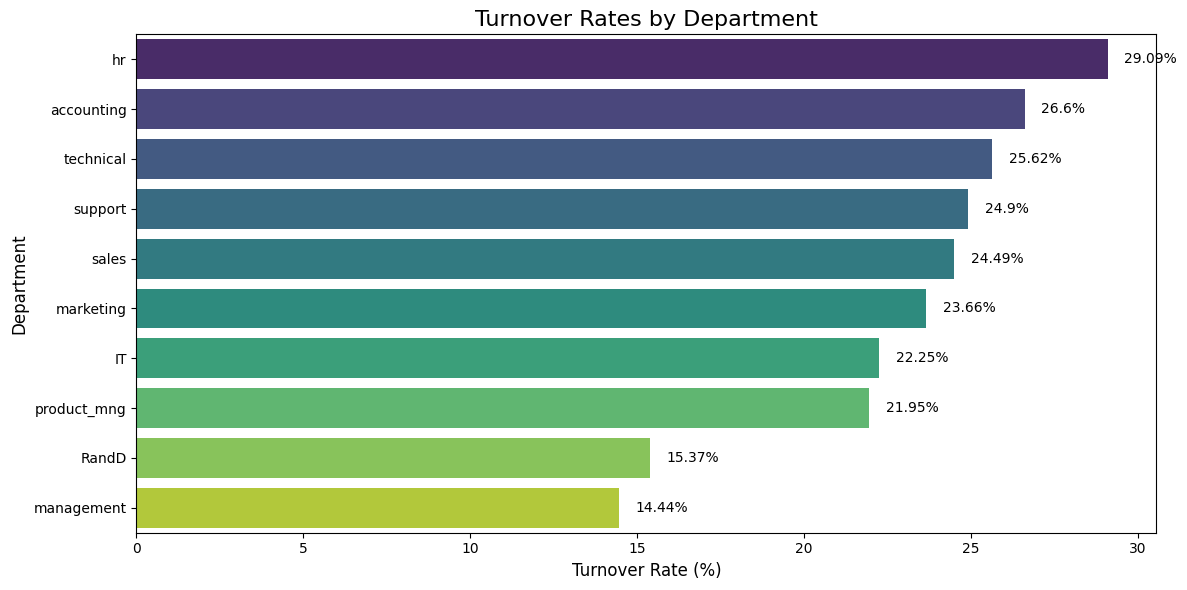

In [25]:
# Cross-tabulation of Department by Turnover
dept_turnover = df.groupby(['Department'], observed=True)['left'].mean().sort_values(ascending=False)
dept_counts = df.groupby('Department')['left'].count()
dept_turnover_percentage = (dept_turnover * 100).round(2)

# Chi-Square Test
contingency_table = pd.crosstab(df['Department'], df['left'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Cramér’s V calculation
n = df.shape[0]
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))

# Output Results
print("Turnover Rates by Department:")
print(dept_turnover)
print("\nChi-Square Test:")
print(f"Chi2-stat = {chi2_stat}, p-value = {p_value}")
print(f"Cramér’s V = {cramers_v:.3f}")

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=dept_turnover_percentage.values, y=dept_turnover_percentage.index, palette="viridis", legend=False, hue=dept_turnover_percentage.index)

# Annotate bar plot
for index, value in enumerate(dept_turnover_percentage):
    plt.text(value + 0.5, index, f"{value}%", va='center', ha='left', fontsize=10)

# Customizations
plt.title("Turnover Rates by Department", fontsize=16)
plt.xlabel("Turnover Rate (%)", fontsize=12)
plt.ylabel("Department", fontsize=12)
plt.tight_layout()

plt.show()

- **Salary Level**

We aim to assess the relationship between salary levels and turnover rates to determine whether salary adjustments could improve retention.

1. **Data Preparation:** \
Calculate turnover rates (proportion of left) for each salary level. \
Create a cross-tabulation of salary and left for statistical testing.
2. **Visualization:** \
Generate a stacked bar chart to illustrate turnover rates for each salary level.
3. **Statistical Testing:**
Perform a Chi-Square test to check for independence between salary and left.
Calculate Cramér’s V to evaluate the effect size of the association.


- **Findings Summary**
    - **Turnover Rates by Salary Level:** \
    *Low salary*: 29.69% turnover. \
    *Medium salary:* 20.43% turnover. \
    *High salary:* 6.63% turnover.
    
    The data confirms that employees with low and medium salaries experience significantly higher turnover compared to those with high salaries.
    
    - **Chi-Square Test:** \
    The test statistic (381.23) and an extremely low p-value (≈1.65e-83) indicate a significant relationship between salary level and turnover.
    - **Cramér’s V:** \
    A value of 0.159 suggests a small-to-moderate effect size, implying salary is one of several factors influencing turnover.

- **Actionable Insights**
    - **Retain Low and Medium-Salary Employees:** \
    Offer competitive salary adjustments or non-monetary benefits to employees in the low and medium salary categories to reduce turnover risk.
    - **Tailored Strategies:** \
    Focus retention strategies for low-salary employees on immediate incentives like bonuses or recognition programs. \
    For medium-salary employees, focus on career development opportunities and pathways to higher-paying roles.
    - **Monitor Trends**: \
    Continuously track the correlation between salary adjustments and turnover to assess the effectiveness of interventions.

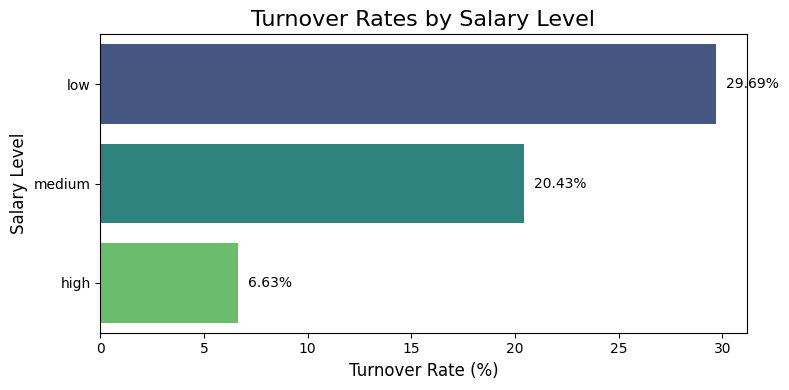

Turnover Rates by Salary Level:
salary
low       0.296884
medium    0.204313
high      0.066289
Name: left, dtype: float64

Chi-Square Test: Chi2-stat = 381.22504706621066, p-value = 1.652086749295958e-83
Cramér’s V = 0.15942615087949968


In [26]:
# Cross-tabulation for Salary and Turnover
salary_turnover = df.groupby(['salary'], observed=True)['left'].mean().sort_values(ascending=False)
salary_turnover_percentage = (salary_turnover * 100).round(2)
# Chi-Square Test
salary_crosstab = pd.crosstab(df['salary'], df['left'])
chi2_stat, p_val, dof, _ = chi2_contingency(salary_crosstab)

# Cramér's V Calculation
n = df.shape[0]
cramers_v = np.sqrt(chi2_stat / (n * (min(salary_crosstab.shape) - 1)))

# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(x=salary_turnover_percentage.values,
            y=salary_turnover_percentage.index,
            palette="viridis", legend=False,
            hue=salary_turnover_percentage.index,
            order=salary_turnover_percentage.index)

# Annotate bar plot
for index, value in enumerate(salary_turnover_percentage):
    plt.text(value + 0.5, index, f"{value}%", va='center', ha='left', fontsize=10)

# Customizations
plt.title("Turnover Rates by Salary Level", fontsize=16)
plt.xlabel("Turnover Rate (%)", fontsize=12)
plt.ylabel("Salary Level", fontsize=12)
plt.tight_layout()

plt.show()

# Output findings
print("Turnover Rates by Salary Level:")
print(salary_turnover)
print(f"\nChi-Square Test: Chi2-stat = {chi2_stat}, p-value = {p_val}")
print(f"Cramér’s V = {cramers_v}")


- **Work Accident**

We will assess the relationship between work accidents and turnover to understand if accidents contribute to higher attrition rates.

1. **Data Preparation:** \
Group employees by whether they experienced a work accident (Work_accident). \
Calculate turnover rates (left) for each group.
2. **Visualization:** \
Create a bar plot showing turnover rates for employees with and without work accidents.
3. **Statistical Testing:** \
Conduct a Chi-square test to determine if there’s a significant association between work accidents and turnover. \
Calculate Cramér’s V to measure the effect size.

- **Findings Summary**:

    - **Turnover Rates by Work Accident**: \
    Employees with no recorded work accidents (Work_accident = 0) had a 26.52% turnover rate. \
    Those with at least one recorded work accident (Work_accident = 1) had a significantly lower 7.79% turnover rate.
    - **Statistical Tests:** \
    Chi-Square Test: Highly significant association between work accidents and turnover, with a chi2-stat of **357.562** and p-value **< 0.001.** \
    Cramér’s V: Moderate effect size at **0.154**, indicating a meaningful relationship.

- **Actionable Insights** \
Lower turnover rates among employees with work accidents suggest that affected individuals may feel more supported or tied to the organization, potentially due to remedial measures or benefits provided post-accident.
    - **Policy Recommendations:** \
    Investigate Safety Policies: While accidents seem to reduce turnover, proactive measures should focus on improving workplace safety to minimize accident occurrence. \
    Evaluate Post-Accident Support: Identify and reinforce factors (e.g., compensation, medical support, job security) that encourage retention among those who experience accidents.

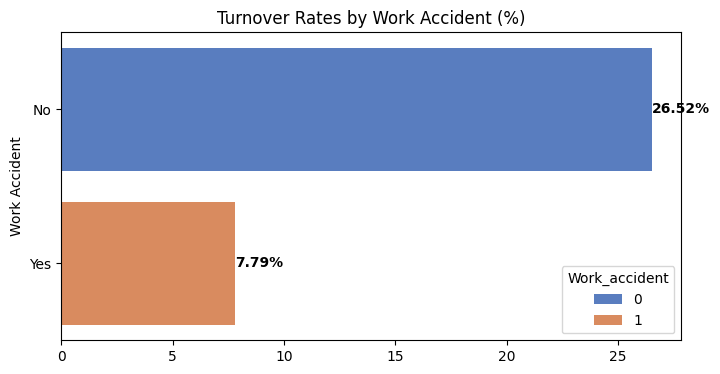

Turnover Rates by Work Accident:
Work_accident
0    26.515978
1     7.791609
Name: left, dtype: float64

Chi-Square Test:
Chi2-stat = 357.562, p-value = 9.56e-80
Cramér’s V = 0.154


In [27]:
# 1. Data Preparation
turnover_by_accident = df.groupby(['Work_accident'], observed=True)['left'].mean().sort_values(ascending=False) * 100
# turnover_by_accident_percentage = (turnover_by_accident * 100).round(2)

# 2. Visualization
plt.figure(figsize=(8, 4))
sns.barplot(y=turnover_by_accident.index,
            x=turnover_by_accident.values,
            palette="muted",
            orient="h",
            hue=turnover_by_accident.index)
plt.title("Turnover Rates by Work Accident (%)")
# plt.xlabel("Turnover Rate (%)")
plt.ylabel("Work Accident")
plt.yticks([0, 1], ["No", "Yes"])
for i, v in enumerate(turnover_by_accident.values):
    plt.text(v, i, f"{v:.2f}%", va='center', fontweight='bold')

plt.show()

# 3. Statistical Testing
# Create a contingency table
contingency_table = pd.crosstab(df['Work_accident'], df['left'])

# Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Cramér's V calculation
n = contingency_table.sum().sum()  # Total number of observations
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))

# Display results
print("Turnover Rates by Work Accident:")
print(turnover_by_accident)
print("\nChi-Square Test:")
print(f"Chi2-stat = {chi2_stat:.3f}, p-value = {p_val:.3g}")
print(f"Cramér’s V = {cramers_v:.3f}")


### **4. Interactions and Composite Indicators**